<a href="https://colab.research.google.com/github/leukschrauber/Assignments/blob/main/assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

*by Fabian Leuk (csba6437/12215478)*

**Reinforcement Learning**

If you choose the topic Reinforcement Learning, I ask you to read the introductory chapters from the course

https://huggingface.co/learn/deep-rl-course/unit0/introduction.

to present. Try to connect the content with a simple example that you choose.

Please also prepare a presentation that summarizes the basic content and presents the code of your simple example.

## Key Learnings

I have worked through the first two chapters of the Huggingface course. In the first chapter, I've gained an overview over the broad topic of reinforcement learning. In the second chapter, a specific algorithm of reinforcement learning was presented: Q-Learning.

**Agent**

An agent learns to make decisions by trial and error, with rewards and punishments from the surroundings. The agent represents the reinforcement algorithm as a whole. We can train an agent using Q-Learning.

**Environment**

An environment is a simulated world where an agent can learn by interacting with it. An environment contains a space of states and a space of actions. Typically, a task that the agent has to complete is associated with an environment.

**State**

Complete description of the state of the world. (no hidden information)


**Observation**

Partial description of the state of the environment/world. (not every information about the environment assumed to be knowned)

**Actions**

Discrete Actions: Finite number of actions, such as left, right, up, and down.
Continuous Actions: Infinite possibility of actions; for example, in the case of self-driving cars, the driving scenario has an infinite possibility of actions occurring.

**Tasks**

Episodic: Has a starting point and an ending point. (Video game)

Continuous: Has a starting point but no ending point. (Stock trading)

**Markov Property**

It implies that the action taken by the agent is conditional solely on the present state and independent of the past states and actions.


**Rewards and Discounting**

Rewards/Punishment: Fundamental factor in RL. Tells the agent whether the action taken is good/bad.

RL algorithms are focused on maximizing the cumulative reward.

Reward Hypothesis: RL problems can be formulated as a maximisation of (cumulative) return based on the rewards and punishments received upon the actions of the agent.

Discounting is performed because rewards obtained at the start are more likely to happen as they are more predictable than long-term rewards. To discount, we use a discount rate gamma, which is exponentiated the further away a reward is from the starting point:




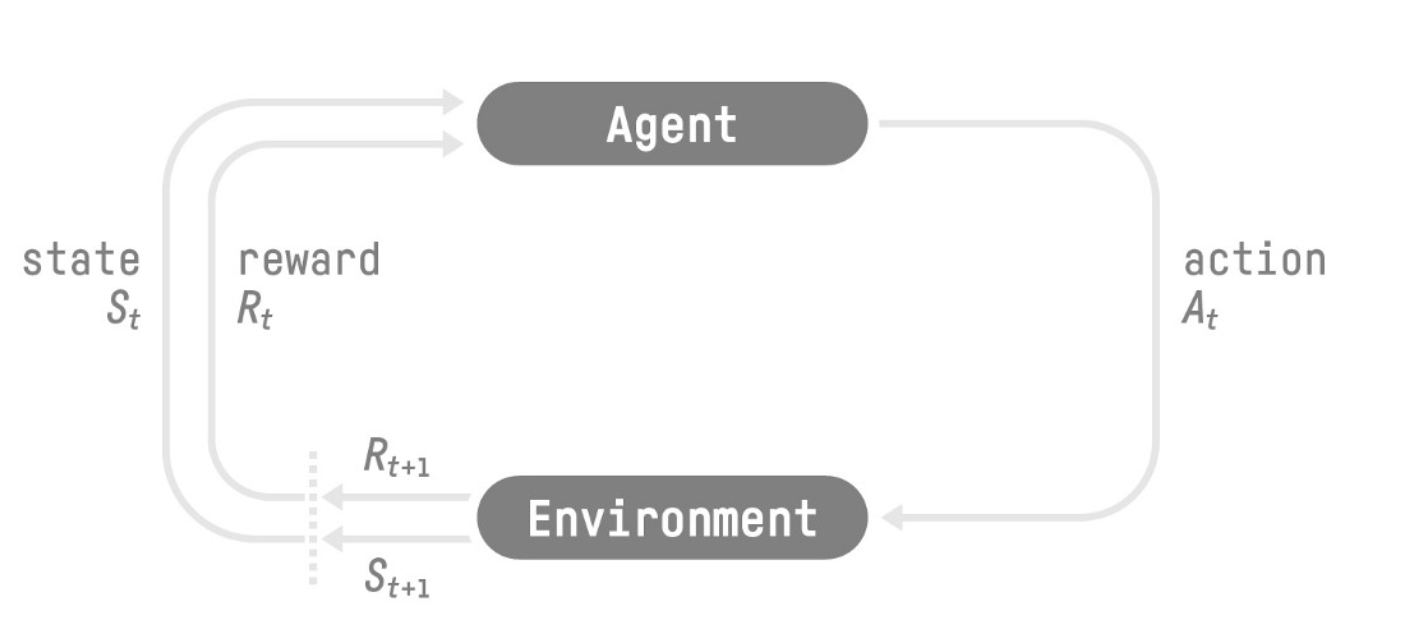

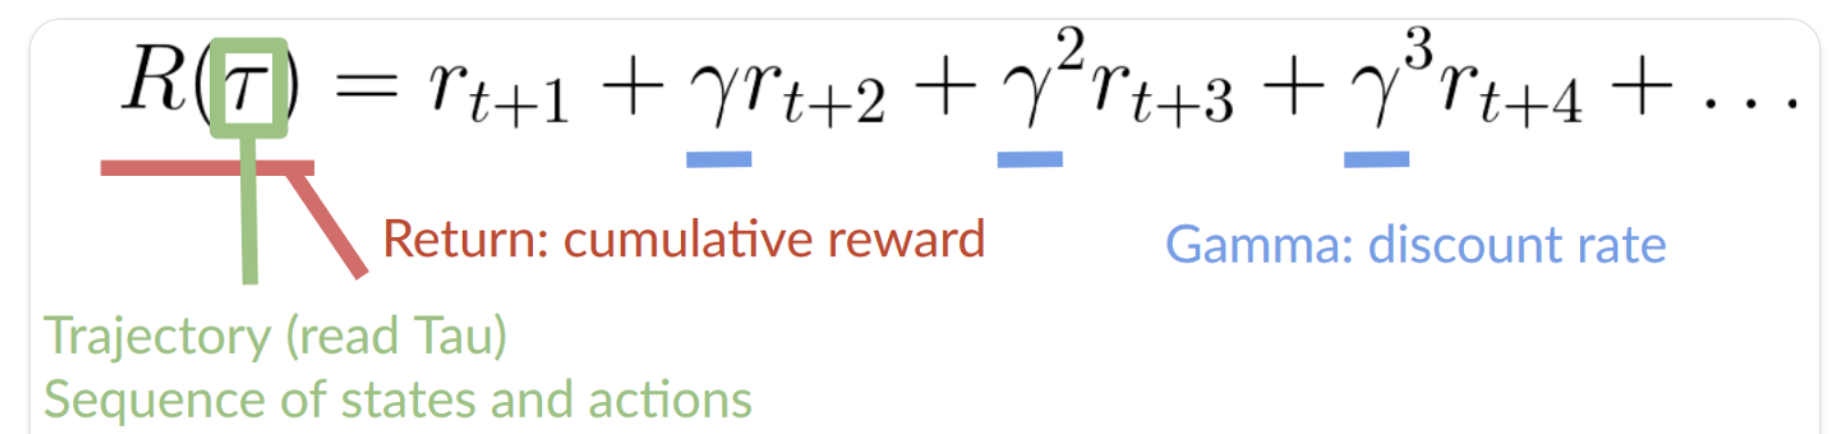

**Learning approaches**

Monte Carlo learning: A full sequence of actions is run and the values for the starting state is updated according to the result of the sequence.


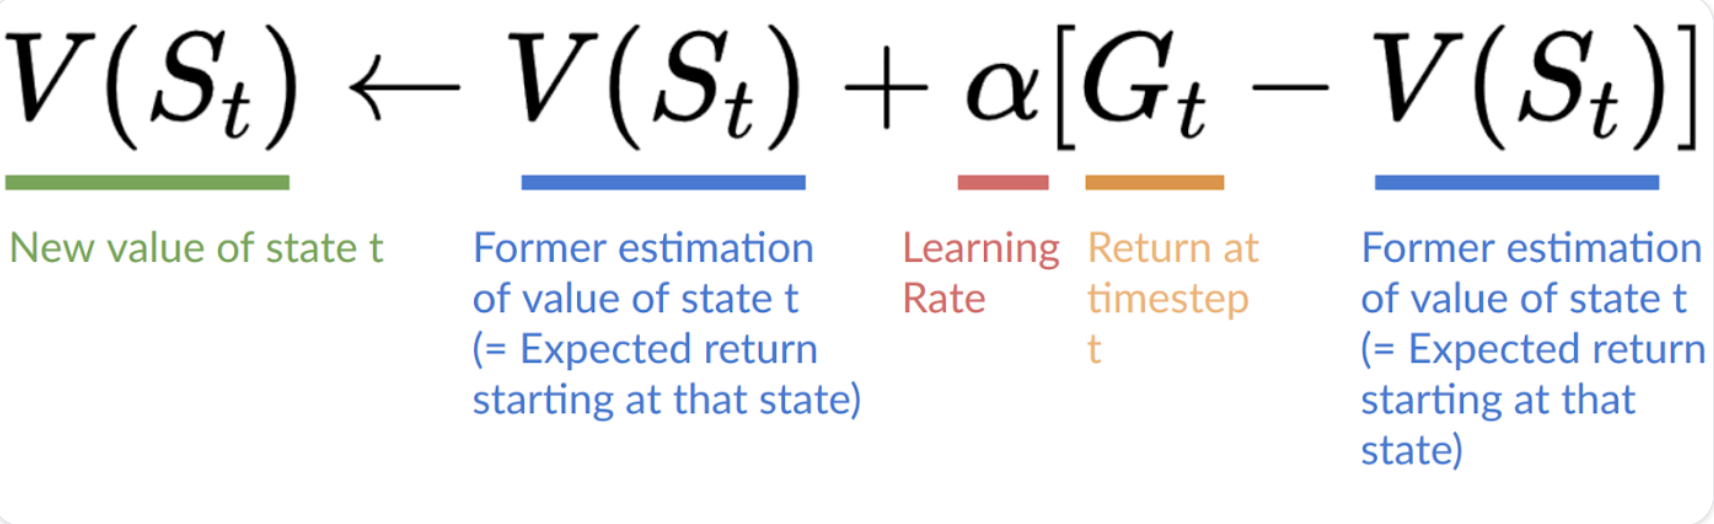

Temporal difference learning: The value of a state-action pair is updated immediately after each action of the agent.

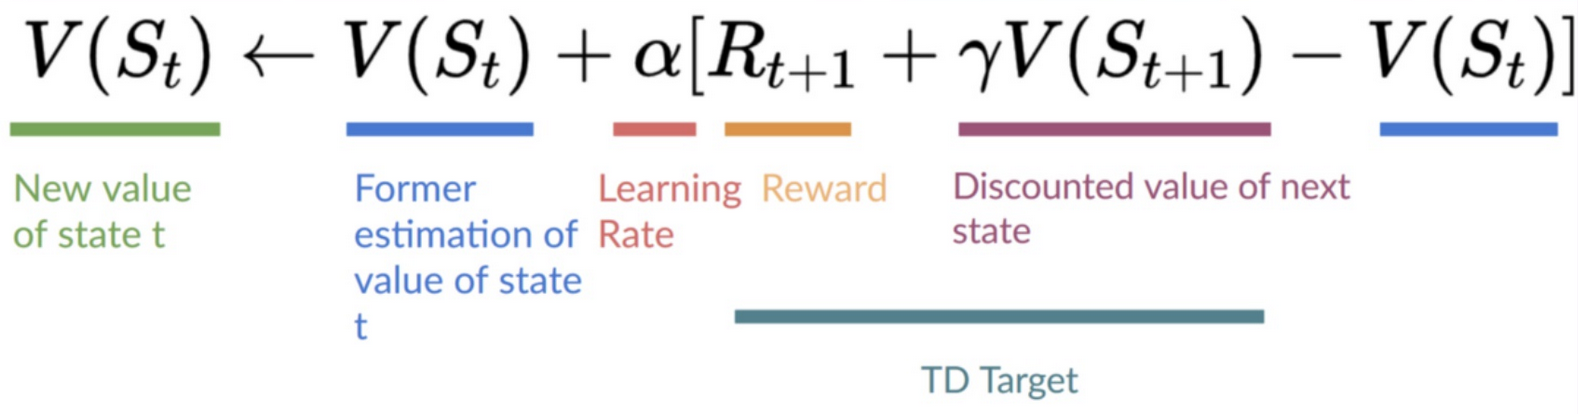

**Exploration v/s Exploitation Trade-Off**

Exploration: It’s all about exploring the environment by trying random actions and receiving feedback/returns/rewards from the environment.

Exploitation: It’s about exploiting what we know about the environment to gain maximum rewards.

Exploration-Exploitation Trade-Off: It balances how much we want to explore the environment and how much we want to exploit what we know about the environment.

Epsilon-greedy strategy: Common strategy used in reinforcement learning that involves balancing exploration and exploitation.
Chooses the action with the highest expected reward with a probability of 1-epsilon.
Chooses a random action with a probability of epsilon.
Epsilon is typically decreased over time to shift focus towards exploitation. Q-Learning uses the epsilon-greedy strategy in the training phase of the Q-Table.

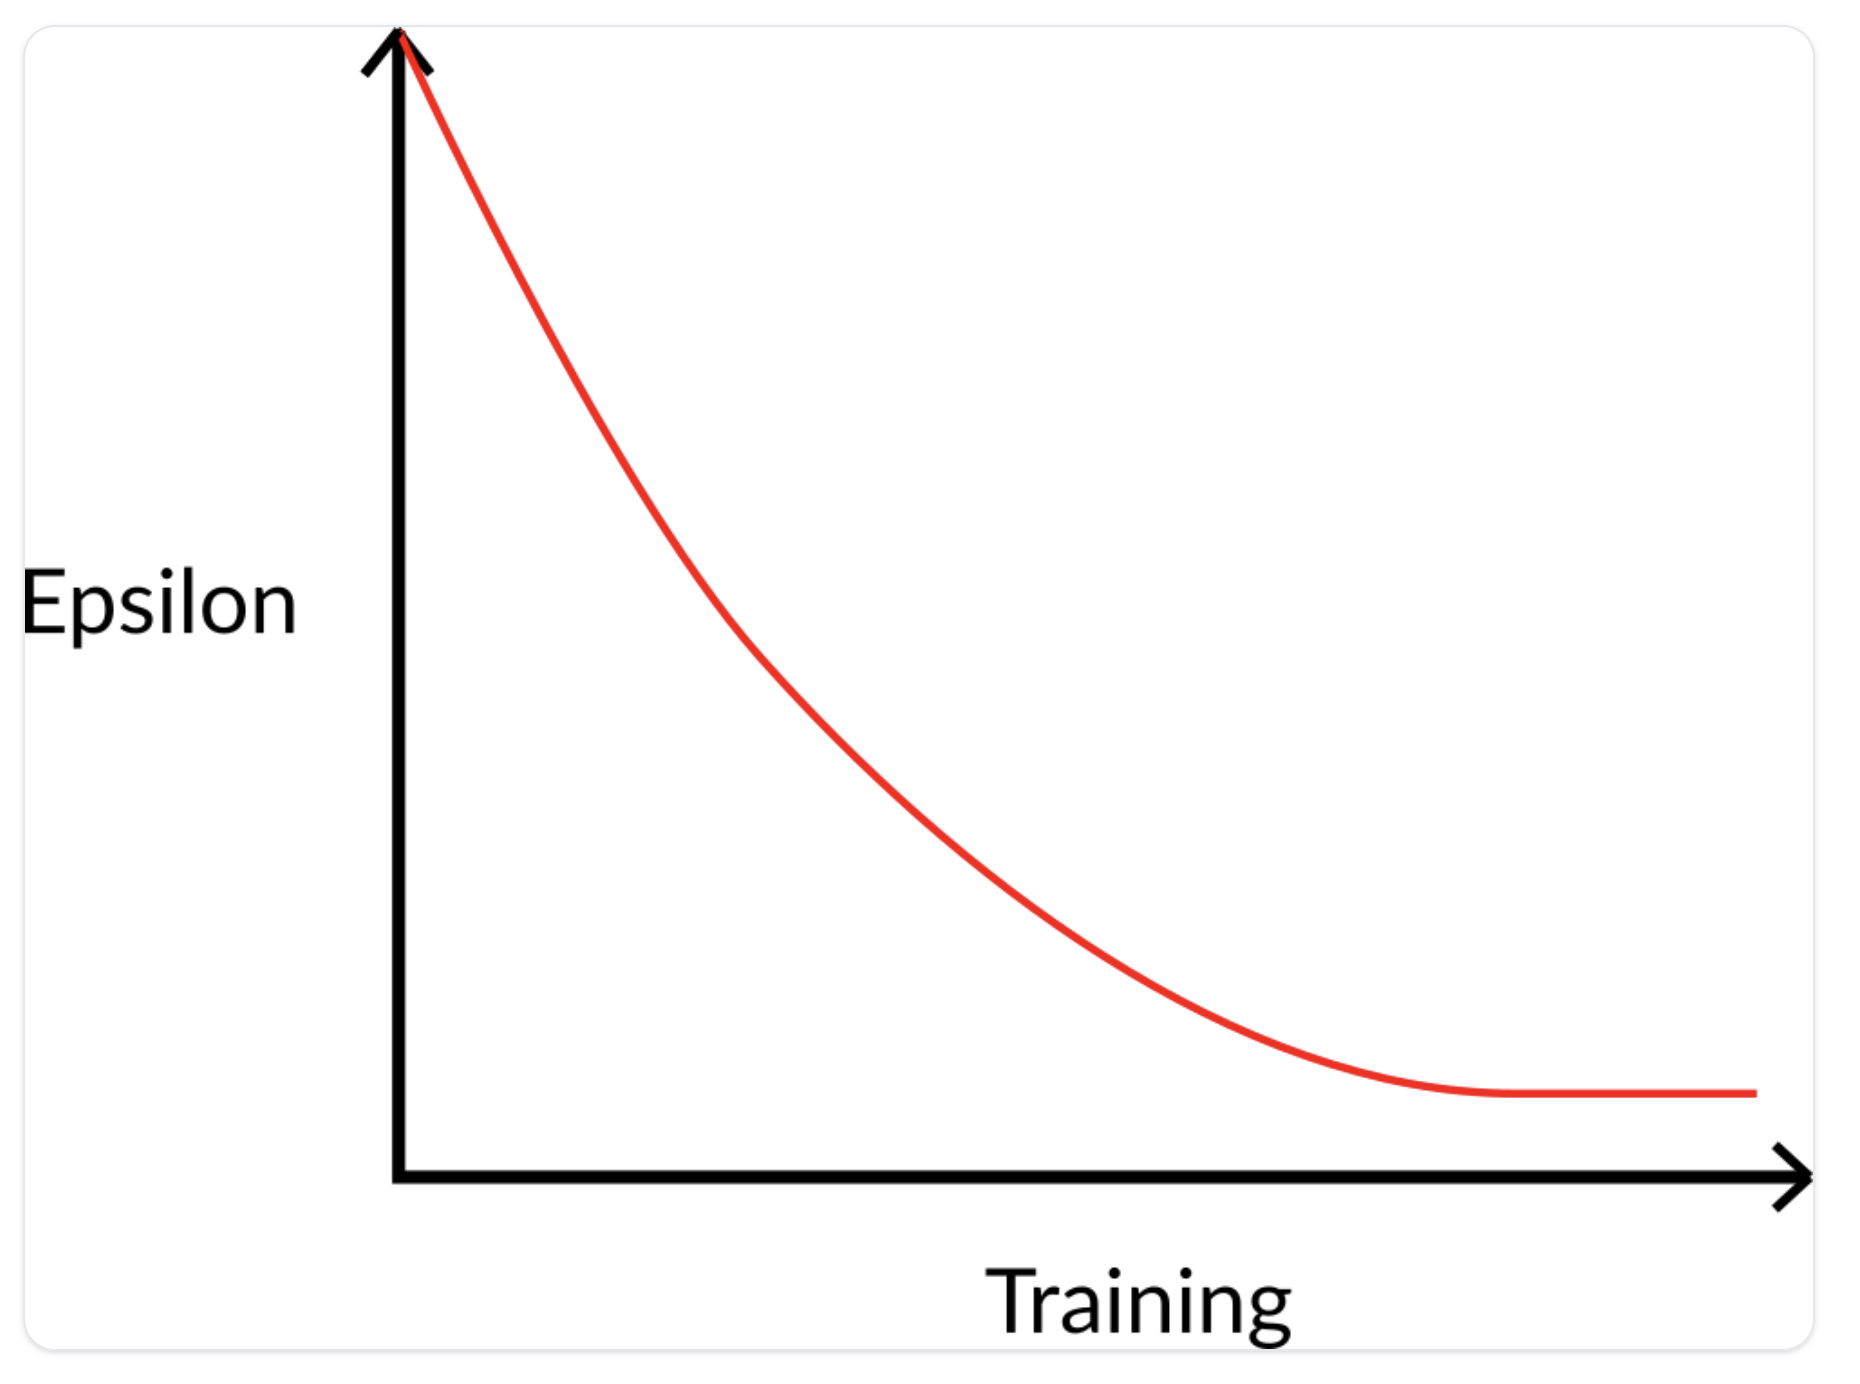

Greedy strategy: Involves always choosing the action that is expected to lead to the highest reward, based on the current knowledge of the environment. (Only exploitation) Always chooses the action with the highest expected reward.Does not include any exploration. Can be disadvantageous in environments with uncertainty or unknown optimal actions. Q-Learning uses the greedy strategy in the evaluation phase.

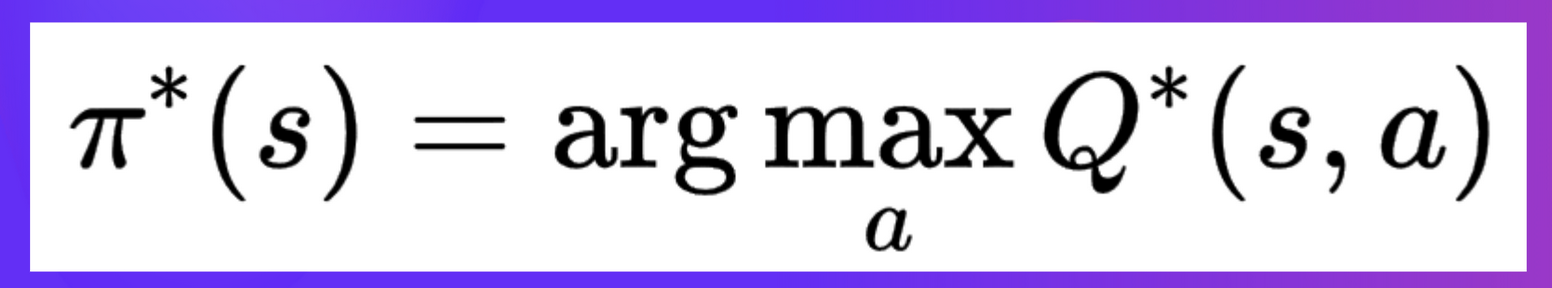


**Policy**

Policy: It is called the agent’s brain. It tells us what action to take, given the state.

Optimal Policy: Policy that maximizes the expected return when an agent acts according to it. It is learned through training.

**Off-policy vs on-policy algorithms**

Off-policy algorithms: A different policy is used at training time and inference time such as in Q-Learning.
On-policy algorithms: The same policy is used during training and inference

**Policy-based Methods**

An approach to solving RL problems.
In this method, the Policy is learned directly.
Will map each state to the best corresponding action at that state. Or a probability distribution over the set of possible actions at that state.

**Value-based Methods**

Another approach to solving RL problems.
Here, instead of training a policy, we train a value function that maps each state to the expected value of being in that state. Q-Learning is a value-based algorithm.

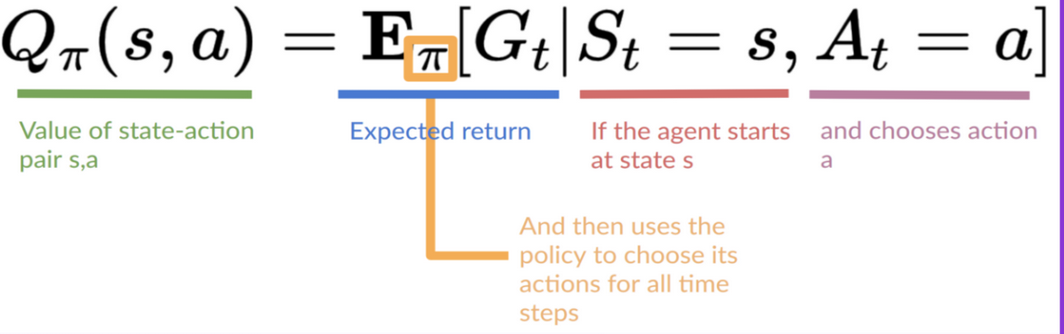

**Bellmann equation**

The Bellmann equation states that the reward of all actions resulting from following a policy beginning at a start state S is the same as the reward of the action associated with state S and all actions resulting from following a policy beginning at a start state S+1.

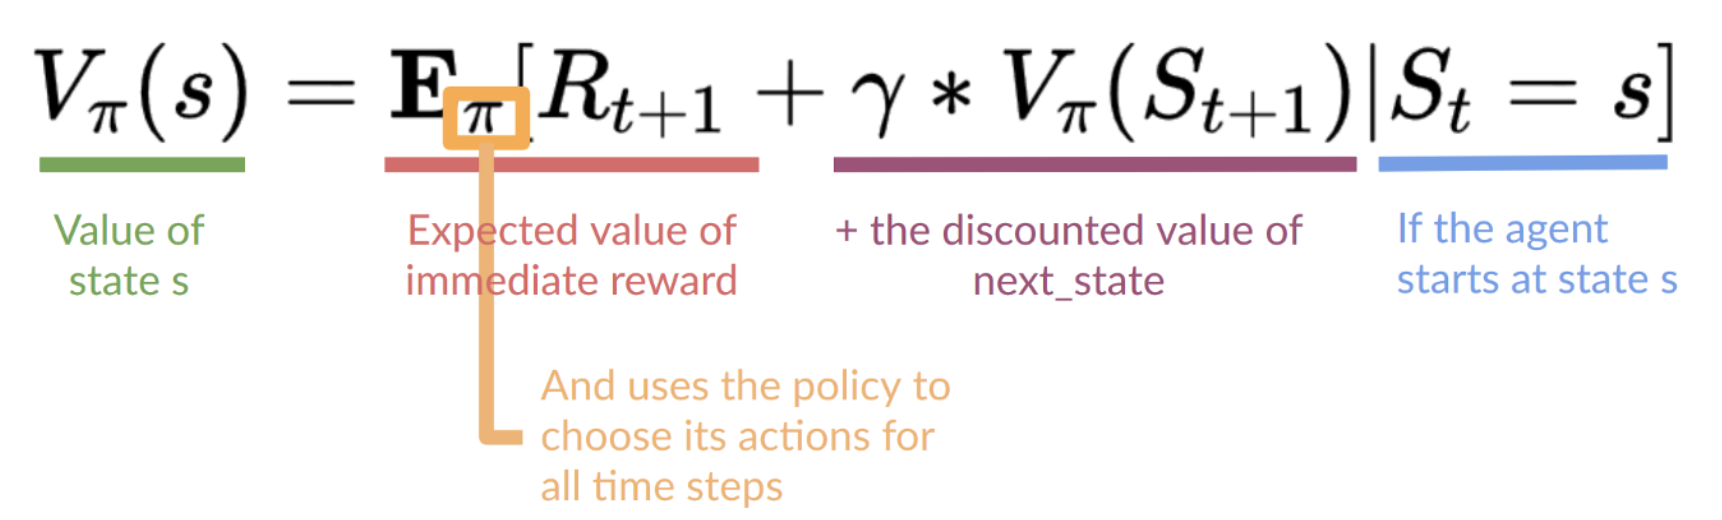

**Q-Learning**

is an off-policy value-based method that uses a TD approach to train its action-value function:

Off-policy: we’ll talk about that at the end of this unit.
Value-based method: finds the optimal policy indirectly by training a value or action-value function that will tell us the value of each state or each state-action pair.
TD approach: updates its action-value function at each step instead of at the end of the episode.

Q-Learning is the algorithm we use to train our Q-function, an action-value function that determines the value of being at a particular state and taking a specific action at that state.

The Q-Function is represented as a matrix mapping each state of the environment to each action.

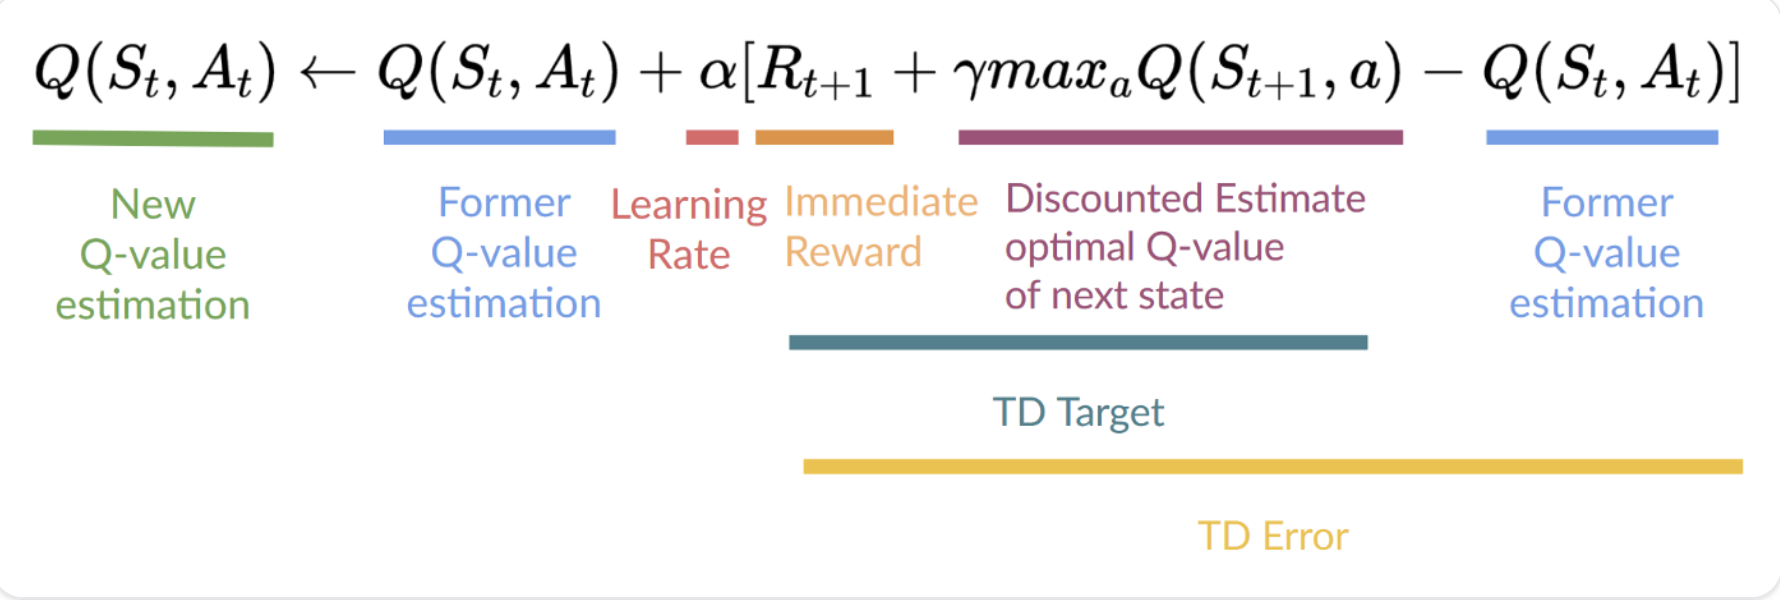

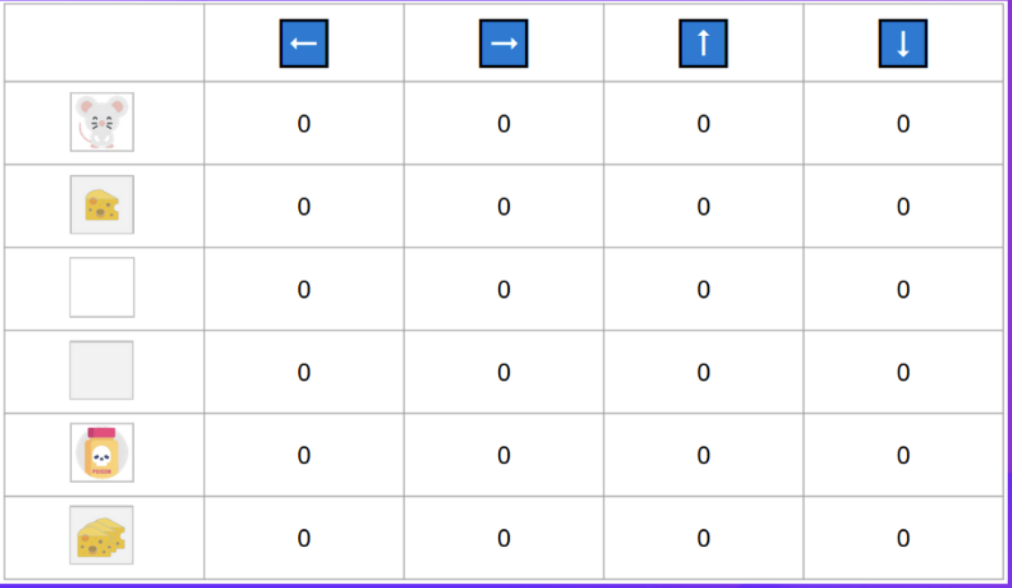

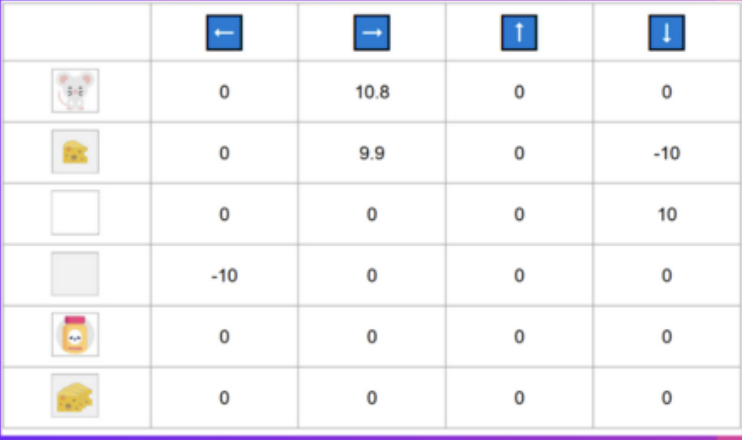

## Q-Learning Code

In [3]:
!pip install gymnasium
!pip install pickle5
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=256392 sha256=c058b143970fa383f3d87621658648d5ff4b58bdf446dda3591b8a392d4293f9
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import gymnasium as gym
import random
import imageio
import os
import tqdm

import pickle5 as pickle
from tqdm.notebook import tqdm

First, we initialize the environment we want to operate our agent in. Gymnasium is a library and repository providing access to a multitude of more or less difficult environments. As described, an environment defines the state and action space, as well as the tasks and any probabilistic determinants. We will use the FrozenLake-v1 environment. The documentation is provided in the link below.

The basic task is to navigate the little man through the ice lake to the present without falling in a hole.

In [19]:
# https://gymnasium.farama.org/environments/toy_text/frozen_lake/

env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="rgb_array")

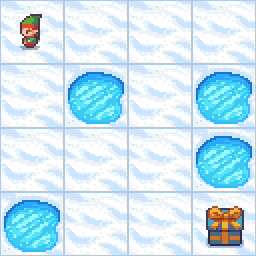

We first create a QTable matrix of size state_space * action_space and set all values associated in the matrix to 0.

In [7]:
# Let's create our Qtable of size (state_space, action_space) and initialized each values at 0 using np.zeros
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space))
  return Qtable
Qtable_frozenlake = initialize_q_table(env.observation_space.n, env.action_space.n)

Define greedy-policy: Exploitation of environment using the most rewarding action associated with a state.

In [8]:
def greedy_policy(Qtable, state):
  # Exploitation: take the action with the highest state, action value
  action = np.argmax(Qtable[state][:])

  return action

Define epsilon greedy policy: Exploration vs. exploitation according to the probability denoted by epsilon. Decrease epsilon exponentially over time as exploration advances.

In [9]:
def epsilon_greedy_policy(Qtable, state, epsilon):
  # Randomly generate a number between 0 and 1
  random_int = random.uniform(0,1)
  # if random_int > greater than epsilon --> exploitation
  if random_int > epsilon:
    # Take the action with the highest value given a state
    # np.argmax can be useful here
    action = greedy_policy(Qtable, state)
  # else --> exploration
  else:
    action = env.action_space.sample()

  return action

Training hyperparameter definition as described by the commments in the code. Most of the are quite similar to supervised learning approaches. Some are different though such as the discount rate gamma and parameters associated with the epsilon greedy strategy.

In [10]:
# Training parameters
n_training_episodes = 10000  # Total training episodes
learning_rate = 0.7          # Learning rate

# Evaluation parameters
n_eval_episodes = 100        # Total number of test episodes

# Environment parameters
env_id = "FrozenLake-v1"     # Name of the environment
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate
eval_seed = []               # The evaluation seed of the environment

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability
decay_rate = 0.0005            # Exponential decay rate for exploration prob

Training algorithm:

Reduce epsilon for each sequence of actions.

For each step in the sequence:

*   Determine action using epsilon greedy
*   Take action and receive new state, rewards, terminated info
*   Use action taken, starting state and the reward to update the Q Table according to the above defined formulas



In [11]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  for episode in tqdm(range(n_training_episodes)):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state, info = env.reset()
    step = 0
    terminated = False
    truncated = False

    # repeat
    for step in range(max_steps):
      # Choose the action At using epsilon greedy policy
      action = epsilon_greedy_policy(Qtable, state, epsilon)

      # Take action At and observe Rt+1 and St+1
      # Take the action (a) and observe the outcome state(s') and reward (r)
      new_state, reward, terminated, truncated, info = env.step(action)

      # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])

      # If terminated or truncated finish the episode
      if terminated or truncated:
        break

      # Our next state is the new state
      state = new_state
  return Qtable

In [12]:
Qtable_frozenlake = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_frozenlake)
Qtable_frozenlake

  0%|          | 0/10000 [00:00<?, ?it/s]

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77378094, 0.77378094],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

Evaluation algorithm:

For each episode determine a sequence of actions using the greedy algorithm (Off-Policy), sum up the rewards for the sequence.

After all sequences, average the rewards of sequence and determine standard deviation.


In [16]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param env: The evaluation environment
  :param n_eval_episodes: Number of episode to evaluate the agent
  :param Q: The Q-table
  """
  episode_rewards = []
  for episode in tqdm(range(n_eval_episodes)):
    state, info = env.reset()
    step = 0
    truncated = False
    terminated = False
    total_rewards_ep = 0

    for step in range(max_steps):
      # Take the action (index) that have the maximum expected future reward given that state
      action = greedy_policy(Q, state)
      new_state, reward, terminated, truncated, info = env.step(action)
      total_rewards_ep += reward

      if terminated or truncated:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [18]:
evaluate_agent(env, max_steps, n_eval_episodes, Qtable_frozenlake)

  0%|          | 0/100 [00:00<?, ?it/s]

(1.0, 0.0)